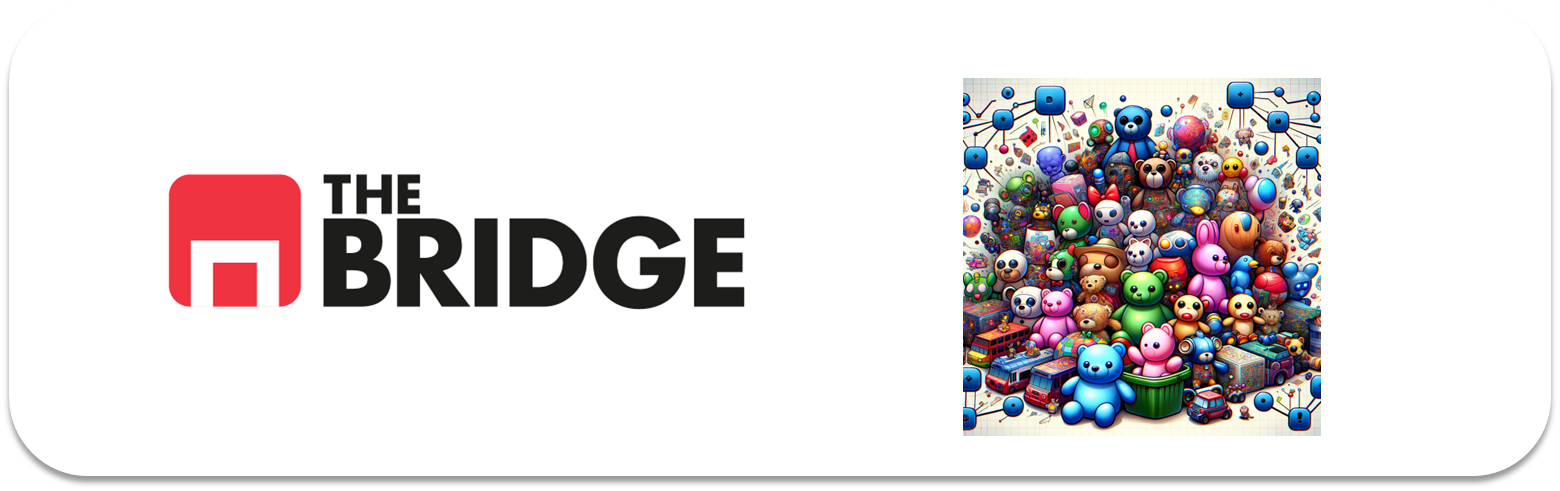

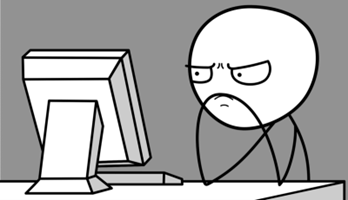

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vosotros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es especulativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.

# Parte I.

In [2]:
df_bebidas = pd.read_csv("./data/empowering_drinks.csv", sep = "|")

In [3]:
df_bebidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [4]:
df_bebidas.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276


In [5]:
df_bebidas.describe(include="all")

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870


*Los datos han sido transformados, pues todos tiene una std parecida y algunos de ellos valores negativos.*

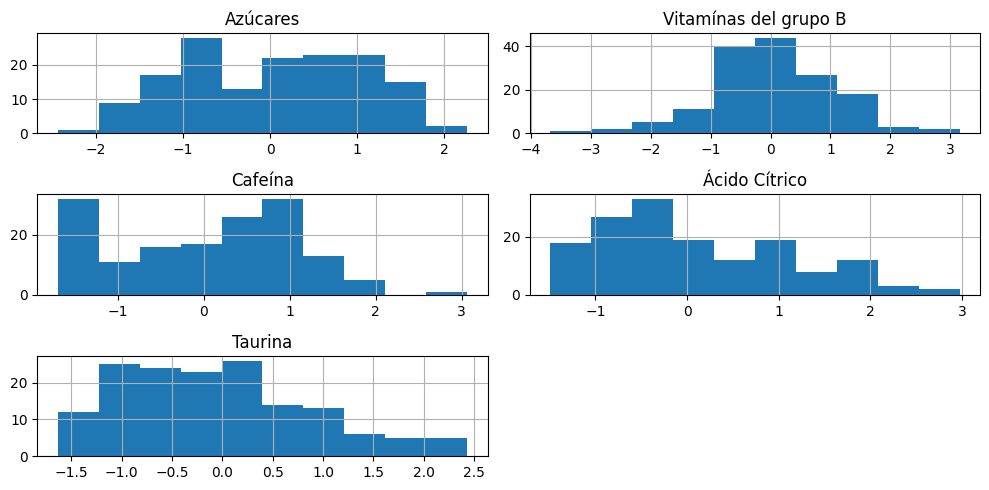

In [6]:
df_bebidas.hist(figsize=(10,5))
plt.tight_layout()

*No veo mucha necesidad de transformar los datos aplicando un logaritmo, por ejemplo.*    
*Quiza el Acido Citrico, pero aunque tiene una cola, esta no baja de manera abrupta, ni se extiende mucho. Tiene pinta de que esa transformacion ya esta aplicada tambien.*

# Features Selection

- Todas son numericas continuas, pues son tipo float y asi se ve en describe.    
- Por lo tanto, vamos a tratar todas como lo que son, numericas continuas.

In [7]:
features_num = list(df_bebidas.columns)
features_num

['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']

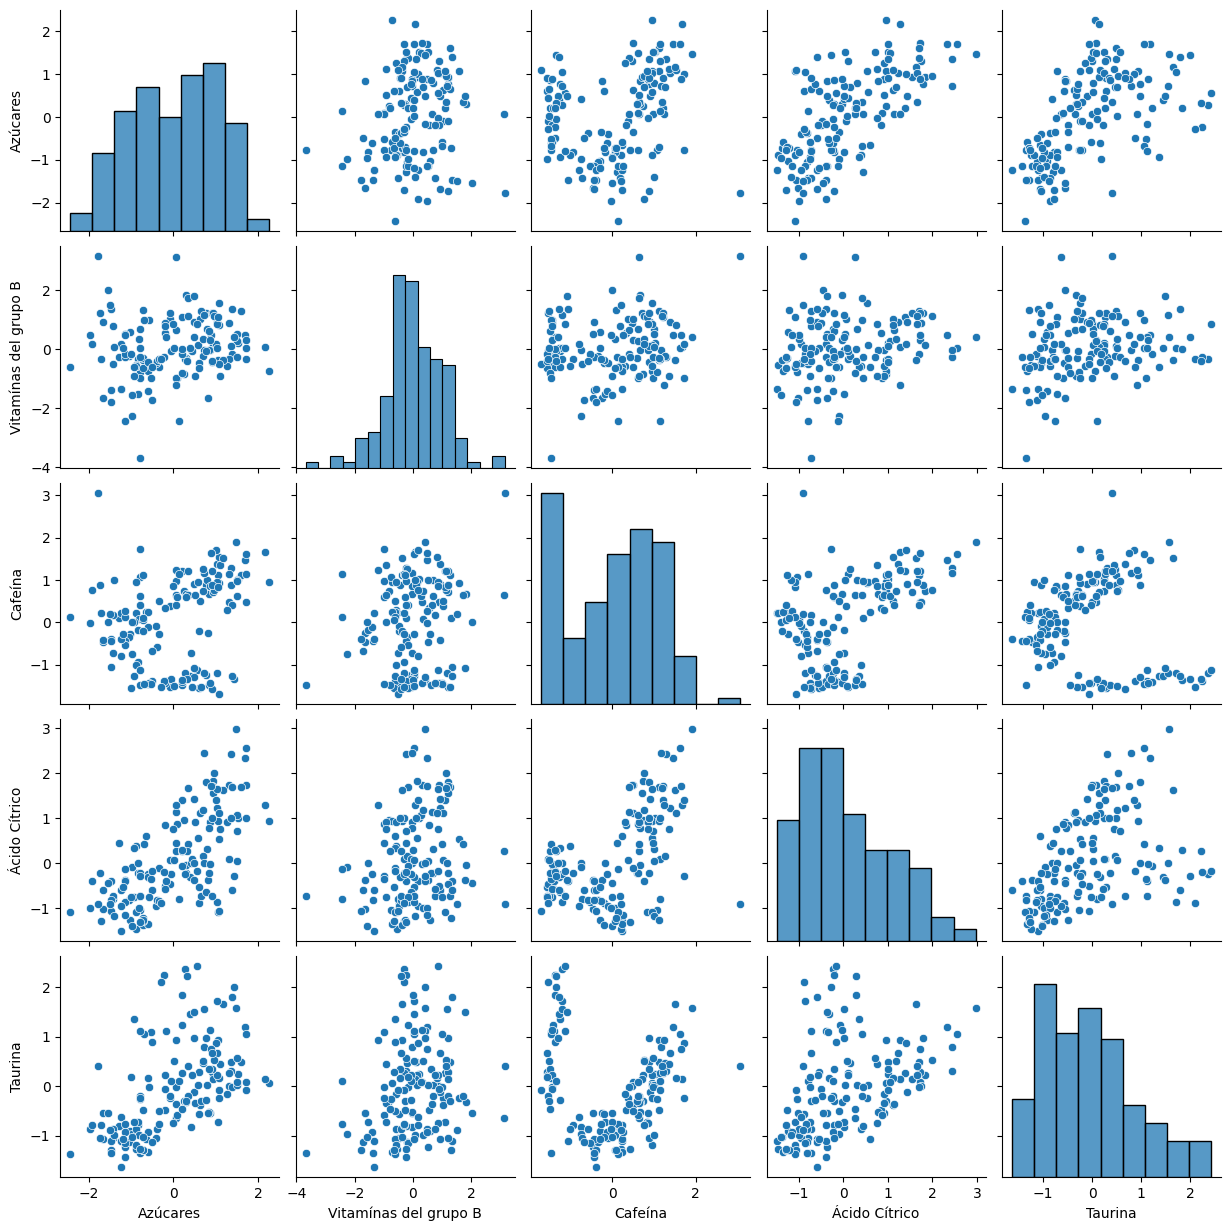

In [8]:
sns.pairplot(df_bebidas)

Vamos a ver si visualmente se aprecian cluster entre las variables (se mencionara la combinacion que parece que tiene ams clusters)

- Azucares:
    - vs. Cafeina = Veo 3 clusters (2 claros y el otro no tanto)
- Vitaminas grupo B:
    -  vs. Cafeina = Veo 2 clusters poco claros . Si que es verdad que se comporta muy parecido con todas las demas.
- Cafeina:
    - vs. Taurina = Veo 2 cluster muy claros. Vs Azucares tambien tiene 2. En general parece que divida bien la feature Cafeina.
- Acido Citrico:
    - vs. Cafeina = Veo 2 clusters (Podrian ser 3, pero no es tan claro)
- Taurina:
    - vs. Cafeina = Veo 2 o 3 clusters (2 muy claros...bueno creo que los 3 estan claros)       

>Se ve como Cafeina es la feature que mas divide los puntos sobre el resto de features.

<Axes: >

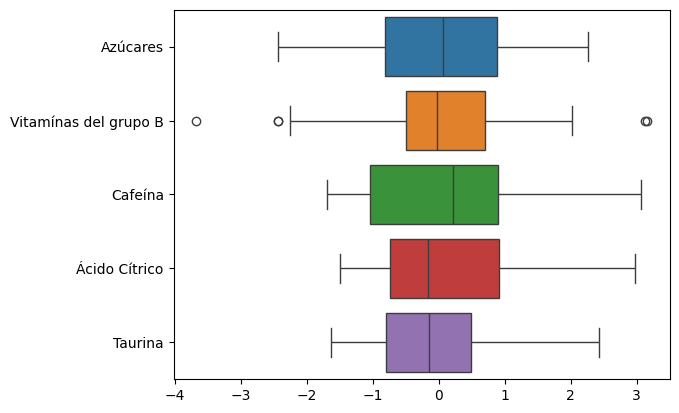

In [9]:
sns.boxplot(df_bebidas, orient="h")

In [10]:
features_num.remove("Vitamínas del grupo B")
features_num.remove("Ácido Cítrico")
features_num

['Azúcares', 'Cafeína', 'Taurina']

In [11]:
df_bebidas = df_bebidas[features_num]
df_bebidas

,Azúcares,Cafeína,Taurina
0,1.518613,1.034819,0.251717
1,0.246290,0.733629,-0.293321
2,0.196879,1.215533,0.269020
3,1.691550,1.466525,1.186068
4,0.295700,0.663351,-0.319276
...,...,...,...
148,0.493343,-1.284344,0.969783
149,0.332758,-1.344582,2.224236
150,0.209232,-1.354622,1.834923
151,1.395086,-1.274305,1.791666


# Modelo 1: DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.001,3,50): # Genera 50 valores equidistantes entre 0.001 y 3
    
    # Creamos el modelo
    dbscan = DBSCAN(eps=eps,min_samples=2*df_bebidas.shape[1]) # min_samples dos veces el ´numero de features -> 2 por dimensión del hiperespacio en el que representamos el conjunto de puntos... No le des muchas vueltas es un número muy orientativo. Pero piensa que si fuera un recta querrías 2 valores, un plano 4, un cubo 6...
    dbscan.fit(df_bebidas)
   
     
    # Registramos el porcentaje de anomalías (recuerda que se etiquetan como -1)
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

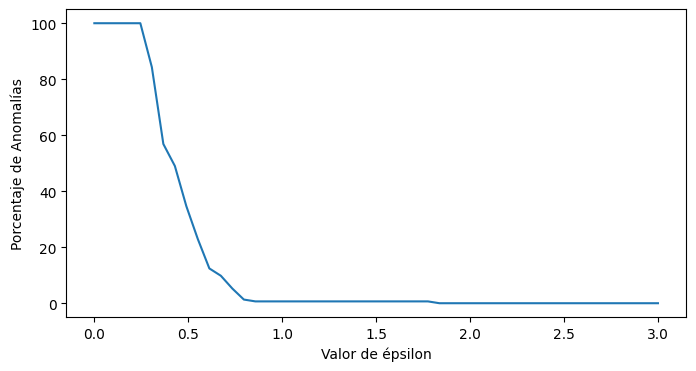

In [13]:
plt.figure(figsize = (8,4), dpi = 100)
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Porcentaje de Anomalías")
plt.xlabel("Valor de épsilon")
plt.show()

In [14]:
for indice,eps in [(indice,val) for indice,val in enumerate(np.linspace(0.001,3,50)) if 0.4 <= val <= 1.0]:
    print(f"Para {eps}: {outlier_percent[indice]}% de anomalías")

Para 0.42942857142857144: 49.01960784313726% de anomalías
Para 0.4906326530612245: 34.64052287581699% de anomalías
Para 0.5518367346938776: 22.875816993464053% de anomalías
Para 0.6130408163265306: 12.418300653594772% de anomalías
Para 0.6742448979591836: 9.803921568627452% de anomalías
Para 0.7354489795918367: 5.228758169934641% de anomalías
Para 0.7966530612244899: 1.3071895424836601% de anomalías
Para 0.8578571428571429: 0.6535947712418301% de anomalías
Para 0.9190612244897959: 0.6535947712418301% de anomalías
Para 0.980265306122449: 0.6535947712418301% de anomalías


*A partir de 0.26 las anomalias ya son menores al 10%*    

In [15]:
dbscan = DBSCAN(eps=0.68, min_samples=6)
dbscan.fit(df_bebidas)

DBSCAN(eps=0.68, min_samples=6)

In [16]:
dbscan.min_samples

6

In [17]:
df_bebidas['Labels'] = dbscan.labels_
df_bebidas['Labels'].value_counts()

C:\Users\Luis\AppData\Local\Temp\ipykernel_19808\4198972168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bebidas['Labels'] = dbscan.labels_


Labels
 0    56
 1    45
 2    37
-1    15
Name: count, dtype: int64

In [18]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    #plt.scatter(anomalies[:, 0], anomalies[:, 1],
    #            c="r", marker="x", s=100)
    #plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

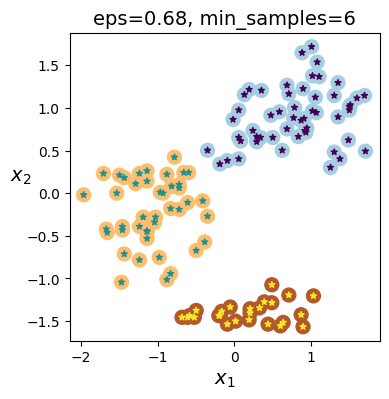

In [19]:
plt.figure(figsize=(4, 4))
plot_dbscan(dbscan, df_bebidas, size=100)
plt.show()

# Modelo 2 = Clustering Jerárquico

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

*Average no me acaba de convencer, vamos a ver otros metodos.*

In [21]:
df_bebidas.drop(columns="Labels", inplace=True)

C:\Users\Luis\AppData\Local\Temp\ipykernel_19808\1853028612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bebidas.drop(columns="Labels", inplace=True)


In [22]:
link_method = linkage(df_bebidas, method = 'average')

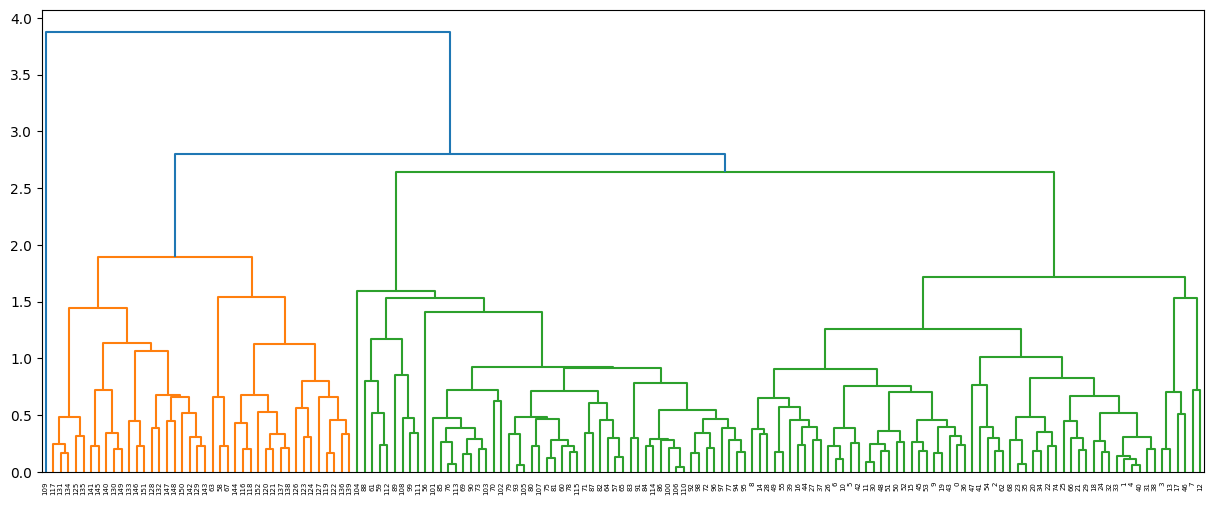

In [23]:
plt.figure(figsize =(15,6))
dend = dendrogram(link_method)

*Single esta claro que no*

In [24]:
link_method = linkage(df_bebidas, method = 'single')

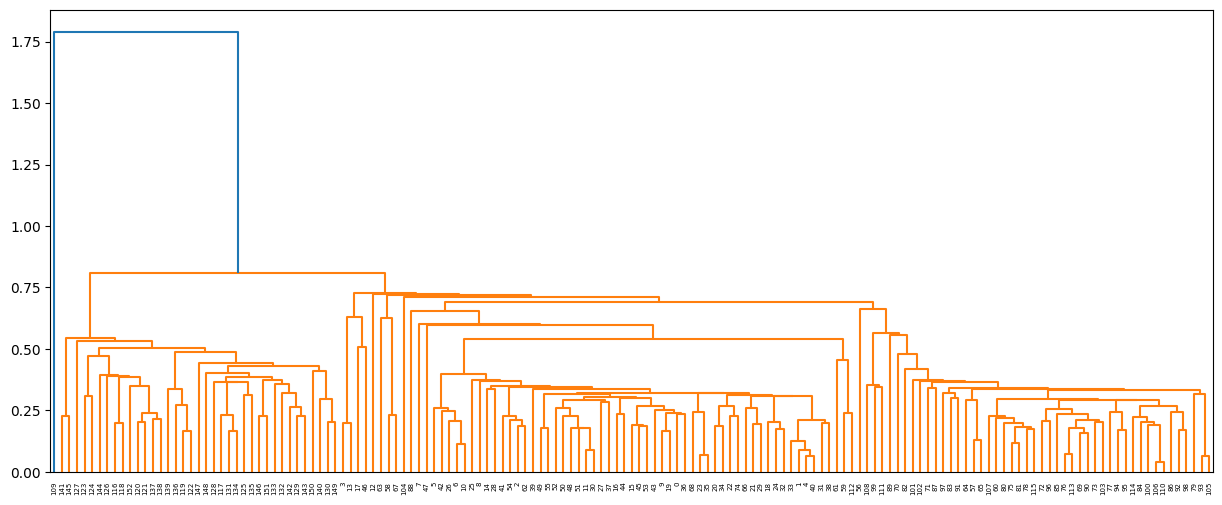

In [25]:
plt.figure(figsize =(15,6))
dend = dendrogram(link_method)

*El metodo "ward" parece que da una figura mejor estrucutada. Nos quedamremos este.

In [26]:
link_method = linkage(df_bebidas, method = 'ward')

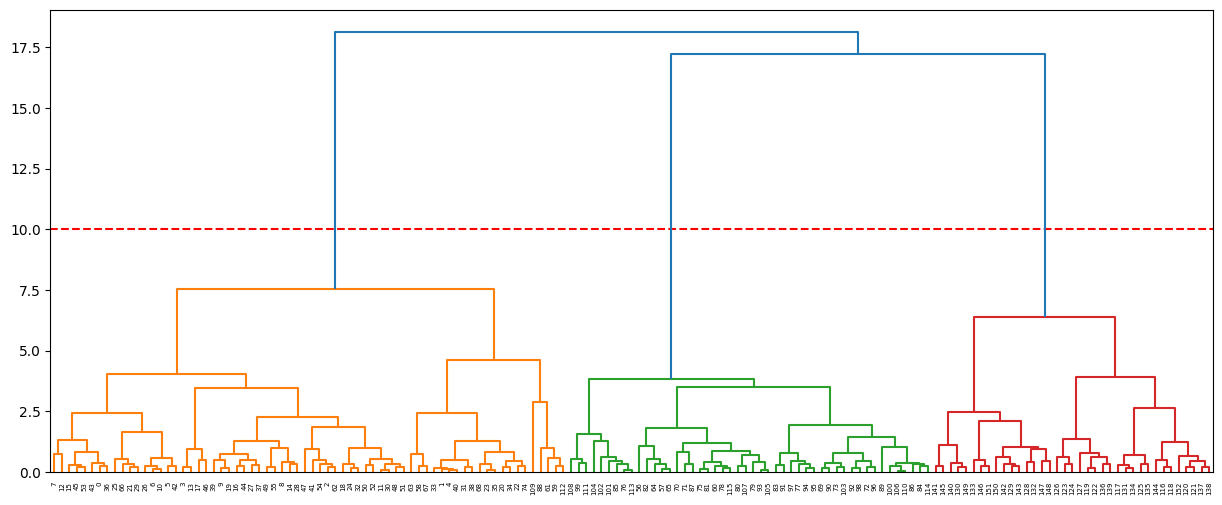

In [27]:
plt.figure(figsize =(15,6))
plt.axhline(y = 10, color = 'r', linestyle = '--')
dend = dendrogram(link_method)

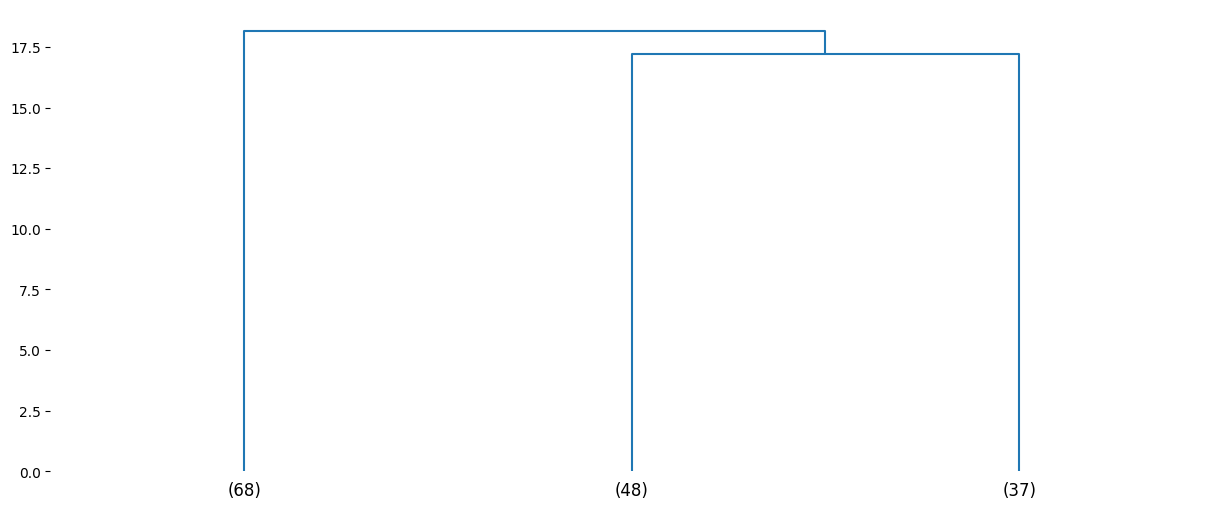

In [28]:
numero_clusters = 3

plt.figure(figsize =(15,6))
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = numero_clusters,
                 )
sns.despine(left=True, bottom=True)

In [29]:
clustering_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clustering_model.fit(df_bebidas)
df_bebidas['Cluster'] = clustering_model.labels_
df_bebidas['Cluster'].value_counts()

C:\Users\Luis\AppData\Local\Temp\ipykernel_19808\3928518917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bebidas['Cluster'] = clustering_model.labels_


Cluster
0    68
2    48
1    37
Name: count, dtype: int64

In [30]:
df_bebidas

,Azúcares,Cafeína,Taurina,Cluster
0,1.518613,1.034819,0.251717,0
1,0.246290,0.733629,-0.293321,0
2,0.196879,1.215533,0.269020,0
3,1.691550,1.466525,1.186068,0
4,0.295700,0.663351,-0.319276,0
...,...,...,...,...
148,0.493343,-1.284344,0.969783,1
149,0.332758,-1.344582,2.224236,1
150,0.209232,-1.354622,1.834923,1
151,1.395086,-1.274305,1.791666,1


Text(0.5, 1.0, 'Labeled Customer Data')

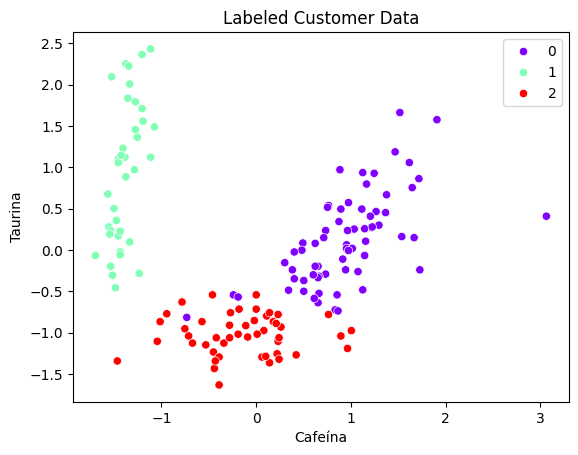

In [31]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Cafeína', 
                y='Taurina', 
                data=df_bebidas, 
                hue=data_labels, palette = "rainbow").set_title('Labeled Customer Data')

Text(0.5, 1.0, 'Labeled Customer Data')

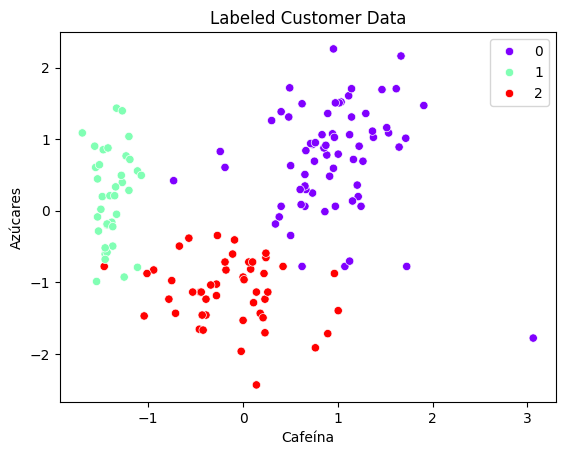

In [32]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Cafeína', 
                y='Azúcares', 
                data=df_bebidas, 
                hue=data_labels, palette = "rainbow").set_title('Labeled Customer Data')

Text(0.5, 1.0, 'Labeled Customer Data')

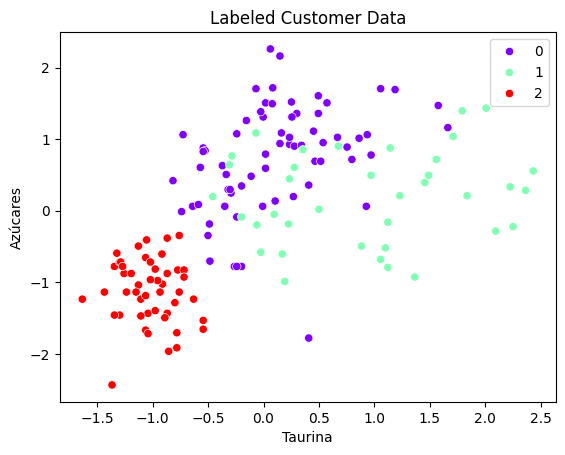

In [33]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Taurina', 
                y='Azúcares', 
                data=df_bebidas, 
                hue=data_labels, palette = "rainbow").set_title('Labeled Customer Data')

# Parte II.

In [34]:
df_bebidas_new = pd.read_csv("./data/new_experiments.csv",sep ="|")

In [35]:
df_bebidas_new

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043


In [36]:
df_bebidas_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               6 non-null      float64
 1   Vitamínas del grupo B  6 non-null      float64
 2   Cafeína                6 non-null      float64
 3   Ácido Cítrico          6 non-null      float64
 4   Taurina                6 non-null      float64
dtypes: float64(5)
memory usage: 372.0 bytes


In [37]:
features_num = list(df_bebidas_new.columns)
features_num


features_num.remove("Vitamínas del grupo B")
features_num.remove("Ácido Cítrico")
features_num

['Azúcares', 'Cafeína', 'Taurina']

In [38]:
df_bebidas_new = df_bebidas_new[features_num]
df_bebidas_new

,Azúcares,Cafeína,Taurina
0,1.481555,1.366128,0.731870
1,0.616869,0.583034,-0.665332
2,-1.680724,-0.340615,-0.976782
3,-0.284874,-0.782361,-0.717240
4,-0.927212,-1.565455,-0.522583
5,0.962743,-1.354622,1.956043


# DBSCAN

- Los pone todos fuera...

In [39]:
dbscan.fit_predict(df_bebidas_new)

array([-1, -1, -1, -1, -1, -1], dtype=int64)

# Clusterización Jerárquica

- Esto ya es otra cosa...

In [40]:
clustering_model.fit_predict(df_bebidas_new)


array([0, 0, 1, 1, 1, 2], dtype=int64)

In [41]:
df_bebidas_new['Cluster'] = clustering_model.labels_

C:\Users\Luis\AppData\Local\Temp\ipykernel_19808\531834161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bebidas_new['Cluster'] = clustering_model.labels_


- No entiendo los colores que da. Los puntos parecen correctos, pero los colores...
- Si asigna el mismo color a cada grupo (según la leyenda), ¿no deberian de estar de otro color?...o quiza es el modelo, ya no lo se...

Text(0.5, 1.0, 'Labeled Customer Data')

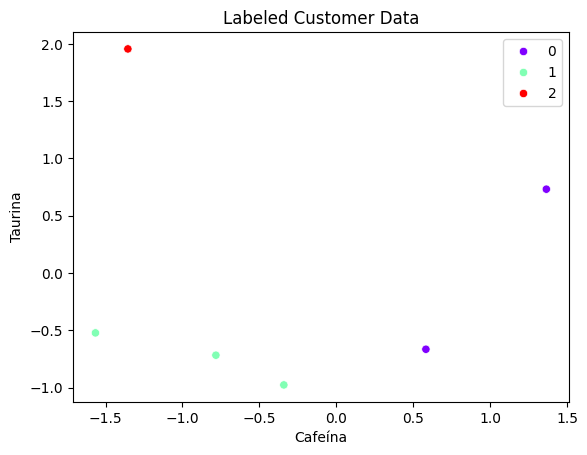

In [42]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Cafeína', 
                y='Taurina', 
                data=df_bebidas_new, 
                hue=data_labels, palette = "rainbow").set_title('Labeled Customer Data')

- Aqui el morado (clase 0) si que esta bien, las otras dos no...

Text(0.5, 1.0, 'Labeled Customer Data')

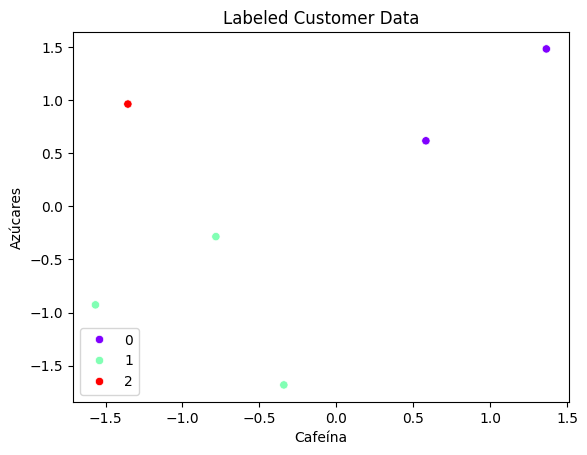

In [44]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Cafeína', 
                y='Azúcares', 
                data=df_bebidas_new, 
                hue=data_labels, palette = "rainbow").set_title('Labeled Customer Data')

- Tampoco esta bien, lo preguntare en clase...

Text(0.5, 1.0, 'Labeled Customer Data')

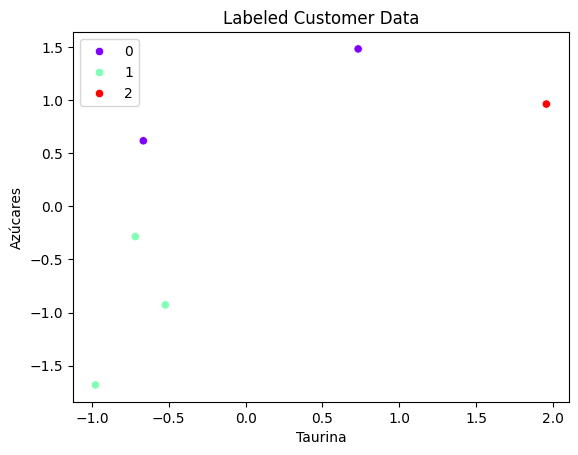

In [45]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Taurina', 
                y='Azúcares', 
                data=df_bebidas_new, 
                hue=data_labels, palette = "rainbow").set_title('Labeled Customer Data')